# Data Exploration

## Imports

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Read data

In [48]:
trainD = pd.read_csv('Data/train.csv', parse_dates=['date'])
trainD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


## Basic Exploration

In [ ]:
trainD.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0,0
1,1,2013-01-01,1,BABY CARE,0,0
2,2,2013-01-01,1,BEAUTY,0,0
3,3,2013-01-01,1,BEVERAGES,0,0
4,4,2013-01-01,1,BOOKS,0,0


In [10]:
trainD.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [11]:
trainD.groupby('family')['sales'].sum()

family
AUTOMOTIVE                         5548220
BABY CARE                           100510
BEAUTY                             3378930
BEVERAGES                       2169544860
BOOKS                                64380
BREAD/BAKERY                   70430616517
CELEBRATION                        7611770
CLEANING                         975212890
DAIRY                            644877090
DELI                           46802472659
EGGS                             155882960
FROZEN FOODS                  127240613908
GROCERY I                      59052944929
GROCERY II                        19627670
HARDWARE                           1034700
HOME AND KITCHEN I                18614910
HOME AND KITCHEN II               15206700
HOME APPLIANCES                     416010
HOME CARE                        160227440
LADIESWEAR                         6511590
LAWN AND GARDEN                    5488420
LINGERIE                           6531140
LIQUOR,WINE,BEER                  77466400
MAGA

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 1 to 1683
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1679 non-null   datetime64[ns]
 1   sales   1679 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.4 KB


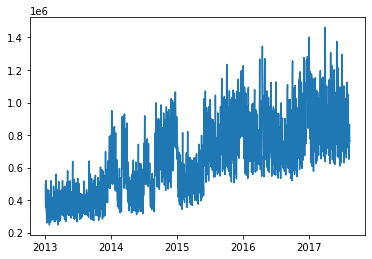

In [58]:
salesPdate = trainD.groupby('date',as_index=False)['sales'].sum()
salesPdate = salesPdate.drop(salesPdate[salesPdate.sales<50000].index)
plt.plot(salesPdate['date'],salesPdate['sales'])
salesPdate.info()

In [28]:
trainD.groupby(['date','family'])['sales'].sum()

date        family                    
2013-01-01  AUTOMOTIVE                            0
            BABY CARE                             0
            BEAUTY                               20
            BEVERAGES                          8100
            BOOKS                                 0
                                            ...    
2017-08-15  POULTRY                       143842548
            PREPARED FOODS                395528360
            PRODUCE                       112067962
            SCHOOL AND OFFICE SUPPLIES        25300
            SEAFOOD                        90099072
Name: sales, Length: 55572, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1588 entries, 1 to 1683
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1588 non-null   datetime64[ns]
 1   sales   1588 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 37.2 KB


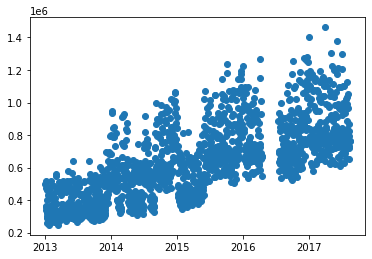

In [59]:
salesPdateWOQuake = salesPdate[(salesPdate['date'] < '2016-04-16') | (salesPdate['date'] >= '2016-07-16')]
salesPdateWOQuake.info()
plt.scatter(salesPdateWOQuake['date'],salesPdateWOQuake['sales'])

In [61]:
isHoliday = pd.read_csv('Data/holidays_events.csv', parse_dates=['date'])
isHoliday = isHoliday.drop(isHoliday[isHoliday.transferred == True].index)
isHoliday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         338 non-null    datetime64[ns]
 1   type         338 non-null    object        
 2   locale       338 non-null    object        
 3   locale_name  338 non-null    object        
 4   description  338 non-null    object        
 5   transferred  338 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 16.2+ KB


In [83]:
#salesPdateWOQuake['is_Holiday'] = [True if x in isHoliday['date'] else False for x in salesPdateWOQuake['date']]
salesPdateWOQuake = salesPdateWOQuake.assign(is_holiday=False)
salesPdateWOQuake.loc[salesPdateWOQuake.apply(lambda x: x.date in isHoliday['date'].to_list(), axis=1), 'is_holiday'] = True
salesPdateWOQuake.head()

,date,sales,is_Holiday,is_holiday
1,2013-01-02,496092.417944,False,False
2,2013-01-03,361461.231124,False,False
3,2013-01-04,354459.677093,False,False
4,2013-01-05,477350.121229,False,True
5,2013-01-06,519695.401088,False,False
